In [2]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 7


In [4]:
from sklearn import datasets
tea = pd.read_csv('//Users//azoz1920//Downloads//tae.data', delimiter="," , names =['Whether of not the TA is a native English speaker (binary)','Course instructor','Course','Summer or regular semester (binary)','Class size','Class attribute'])
tea.head(None)

,Whether of not the TA is a native English speaker (binary),Course instructor,Course,Summer or regular semester (binary),Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [3]:
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
Whether of not the TA is a native English speaker (binary)    151 non-null int64
Course instructor                                             151 non-null int64
Course                                                        151 non-null int64
Summer or regular semester (binary)                           151 non-null int64
Class size                                                    151 non-null int64
Class attribute                                               151 non-null int64
dtypes: int64(6)
memory usage: 7.2 KB


In [4]:
tea.corr()

,Whether of not the TA is a native English speaker (binary),Course instructor,Course,Summer or regular semester (binary),Class size,Class attribute
Whether of not the TA is a native English speaker (binary),1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Summer or regular semester (binary),0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


In [5]:
print(tea["Class attribute"].value_counts())

3    52
2    50
1    49
Name: Class attribute, dtype: int64


In [6]:
tea.describe()

,Whether of not the TA is a native English speaker (binary),Course instructor,Course,Summer or regular semester (binary),Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


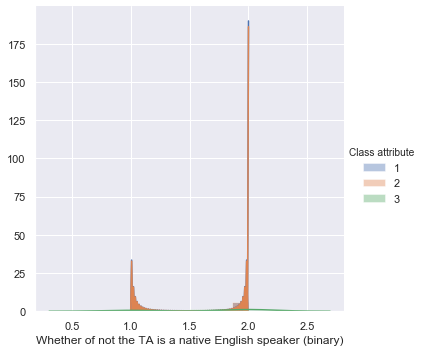

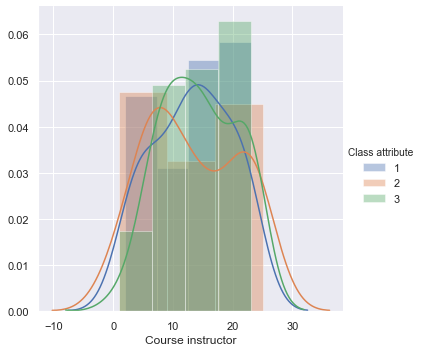

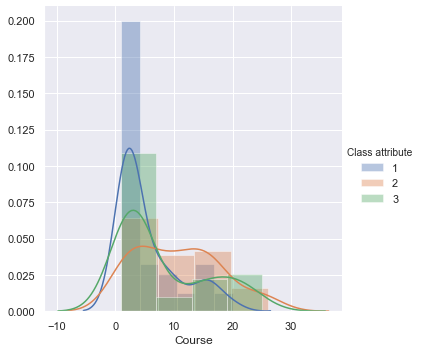

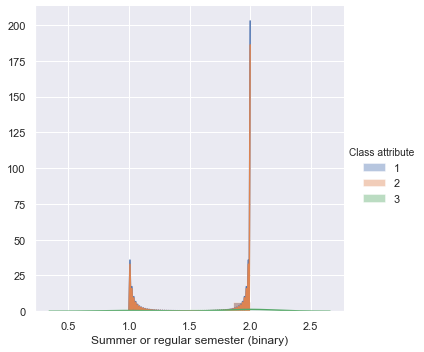

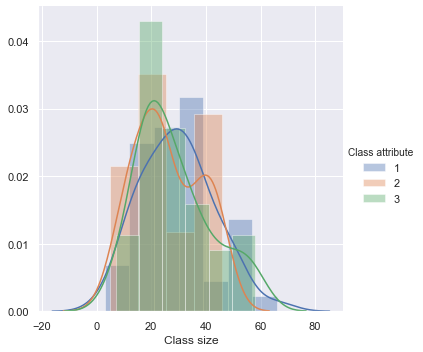

In [7]:
for ojha, feature in enumerate(list(tea.columns)[:-1]):
    fg = sns.FacetGrid(tea, hue='Class attribute', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

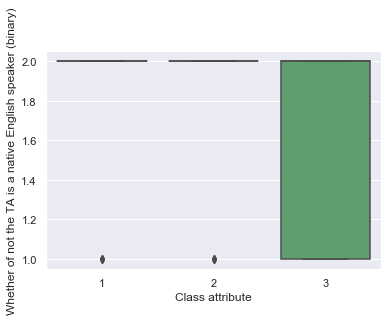

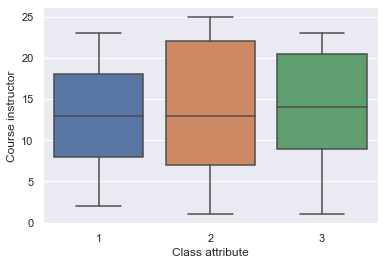

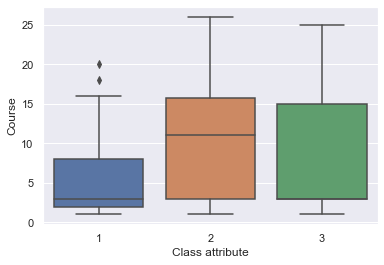

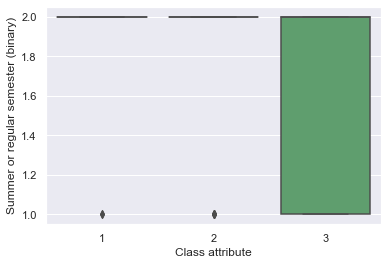

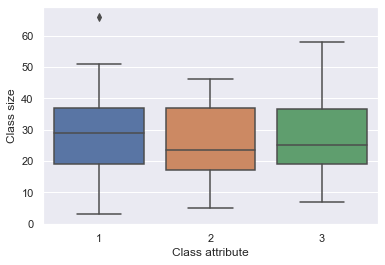

In [8]:
sns.boxplot(x='Class attribute',y='Whether of not the TA is a native English speaker (binary)', data=tea)
plt.show()
sns.boxplot(x='Class attribute',y='Course instructor', data=tea)
plt.show()
sns.boxplot(x='Class attribute',y='Course', data=tea)
plt.show()
sns.boxplot(x='Class attribute',y='Summer or regular semester (binary)', data=tea)
plt.show()
sns.boxplot(x='Class attribute',y='Class size', data=tea)
plt.show()

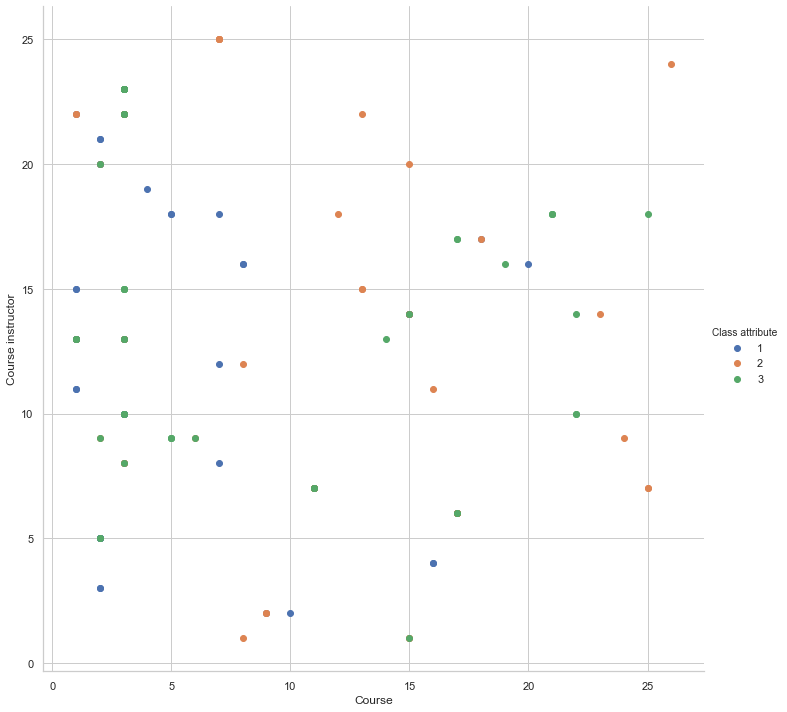

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(tea, hue="Class attribute",height=10)\
   .map(plt.scatter,"Course","Course instructor")\
   .add_legend();
plt.show();

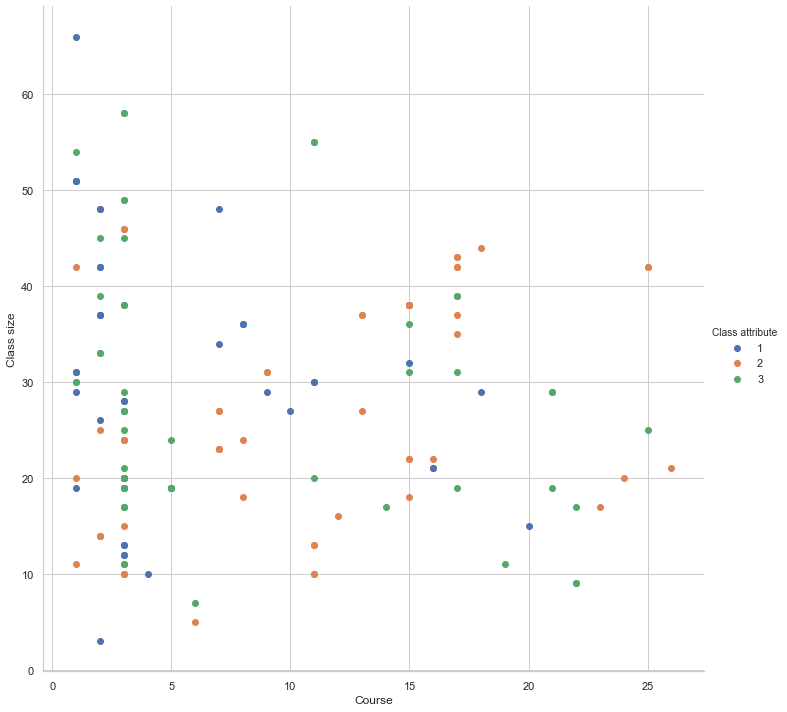

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(tea, hue="Class attribute",height=10)\
   .map(plt.scatter,"Course","Class size")\
   .add_legend();
plt.show();

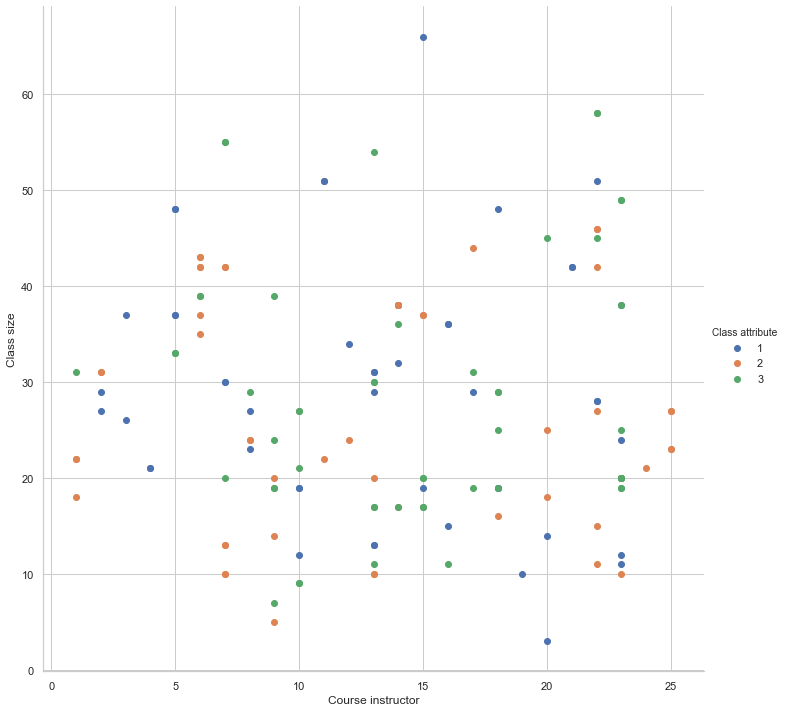

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(tea, hue="Class attribute",height=10)\
   .map(plt.scatter,"Course instructor","Class size")\
   .add_legend();
plt.show();

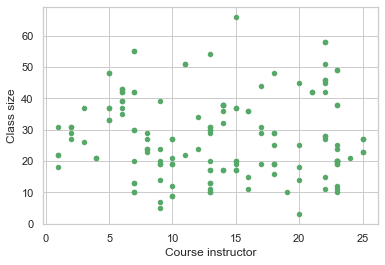

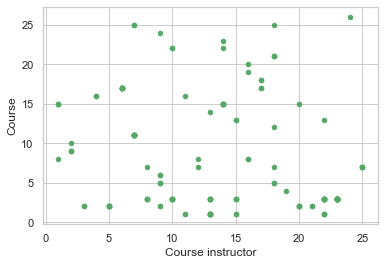

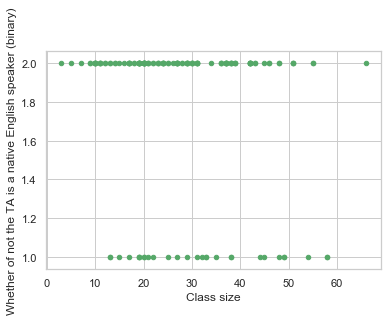

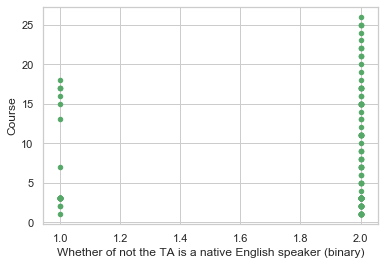

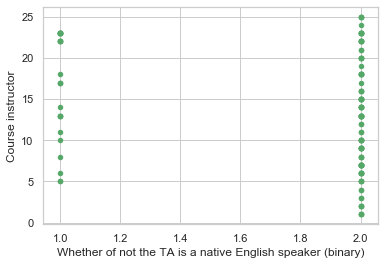

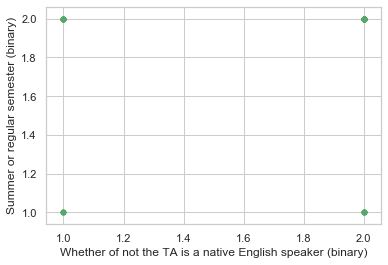

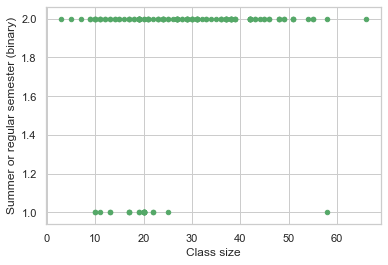

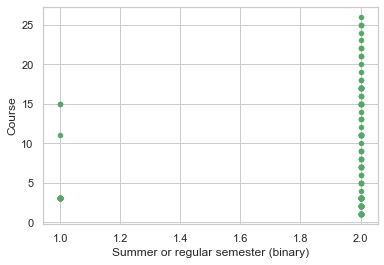

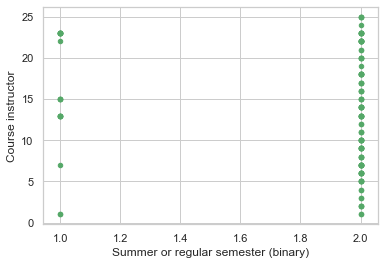

In [12]:
tea.plot(kind ='scatter',x='Course instructor',y='Class size',c='g')
plt.show()
tea.plot(kind ='scatter',x='Course instructor',y='Course',c='g')
plt.show()
tea.plot(kind ='scatter',x='Class size',y='Whether of not the TA is a native English speaker (binary)',c='g')
plt.show()
tea.plot(kind ='scatter',x='Whether of not the TA is a native English speaker (binary)',y='Course',c='g')
plt.show()
tea.plot(kind ='scatter',x='Whether of not the TA is a native English speaker (binary)',y='Course instructor',c='g')
plt.show()
tea.plot(kind ='scatter',x='Whether of not the TA is a native English speaker (binary)',y='Summer or regular semester (binary)',c='g')
plt.show()
tea.plot(kind ='scatter',x='Class size',y='Summer or regular semester (binary)',c='g')
plt.show()
tea.plot(kind ='scatter',x='Summer or regular semester (binary)',y='Course',c='g')
plt.show()
tea.plot(kind ='scatter',x='Summer or regular semester (binary)',y='Course instructor',c='g')
plt.show()

In [13]:
sns.set_style("whitegrid");
sns.pairplot(tea, vars = tea, hue ='Class attribute', diag_kind = 'kde',
            plot_kws = {'alpha':0.9, 's':100, 'edgecolor': 'k'}, size = 20)
plt.show()

/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


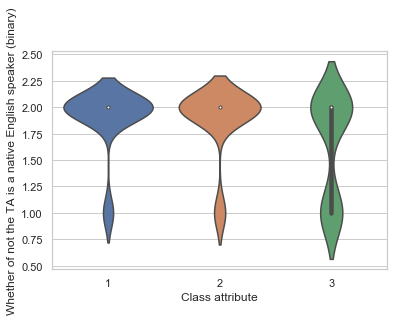

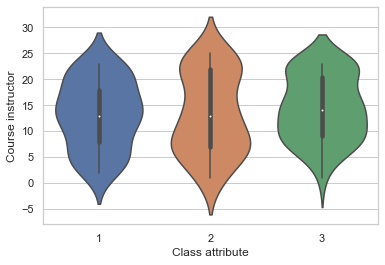

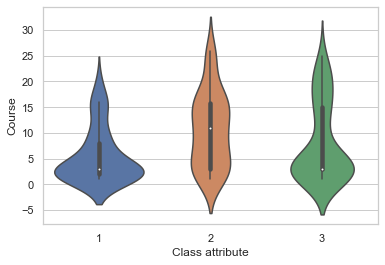

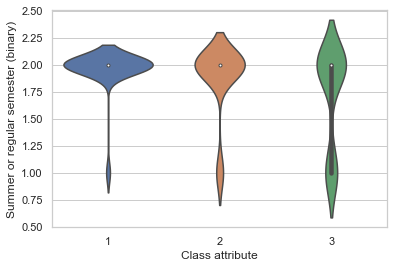

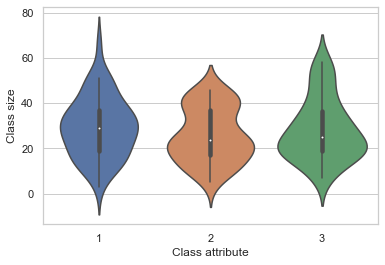

In [14]:
sns.violinplot(x='Class attribute',y='Whether of not the TA is a native English speaker (binary)', data=tea)
plt.show()
sns.violinplot(x='Class attribute',y='Course instructor', data=tea)
plt.show()
sns.violinplot(x='Class attribute',y='Course', data=tea)
plt.show()
sns.violinplot(x='Class attribute',y='Summer or regular semester (binary)', data=tea)
plt.show()
sns.violinplot(x='Class attribute',y='Class size', data=tea)
plt.show()

In [15]:
tea.isnull().sum()

Whether of not the TA is a native English speaker (binary)    0
Course instructor                                             0
Course                                                        0
Summer or regular semester (binary)                           0
Class size                                                    0
Class attribute                                               0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['Whether of not the TA is a native English speaker (binary)','Course instructor','Course','Summer or regular semester (binary)','Class size']
# Separating out the features
x = tea.loc[:, features].values
# Separating out the target
y = tea.loc[:,['Class attribute']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)

[[-2.05107205  1.37548494 -0.7293586  -2.3590713  -0.69002837]
 [ 0.48754991  0.19955726 -0.7293586  -2.3590713  -0.84565836]
 [-2.05107205  1.37548494 -0.7293586   0.42389562  1.6444216 ]
 [-2.05107205 -1.27035233 -0.87220315  0.42389562  0.39938162]
 [ 0.48754991 -0.97637041  0.4133978   0.42389562  2.11131159]
 [ 0.48754991  1.37548494 -0.7293586  -2.3590713  -0.61221337]
 [ 0.48754991 -0.68238849 -0.4436695   0.42389562 -0.69002837]
 [ 0.48754991 -0.53539753 -0.7293586   0.42389562 -0.06750838]
 [-2.05107205  1.22849398 -0.7293586  -2.3590713   2.34475658]
 [ 0.48754991  0.19955726 -0.7293586  -2.3590713  -0.61221337]
 [ 0.48754991 -0.53539753  1.98468785  0.42389562 -1.46817835]
 [ 0.48754991 -0.09442466 -1.0150477   0.42389562  0.16593662]
 [ 0.48754991  0.64053014  1.8418433   0.42389562  0.08812162]
 [ 0.48754991 -1.12336137  1.2704651   0.42389562  0.86627161]
 [ 0.48754991 -1.12336137  1.2704651   0.42389562  1.0997166 ]
 [ 0.48754991 -1.12336137  1.2704651   0.42389562  1.17

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
finalDf = pd.concat([principalDf, tea[['Class attribute']]], axis = 1)

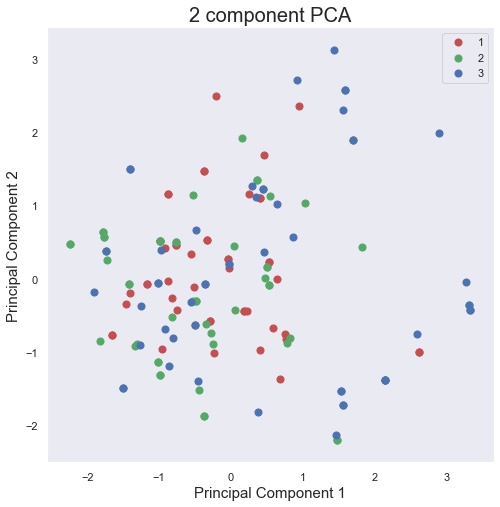

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(color_codes=True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class attribute'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
print(pca.explained_variance_ratio_)

[0.3244882  0.24179918]


In [128]:
le = LabelEncoder()
le.fit(tea['Class attribute'].values)
y = le.transform(tea['Class attribute'].values)
X = tea.drop('Class attribute', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=seed)

In [129]:
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8125


Confusion Matrix is
[[4 1 0]
 [1 3 1]
 [0 0 6]]


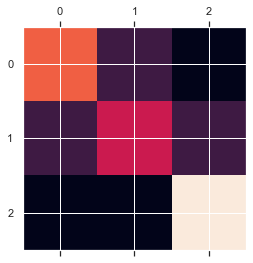

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=tea['Class attribute'].unique()))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           2       0.86      1.00      0.92         6
           1       0.75      0.60      0.67         5

   micro avg       0.82      0.82      0.82        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.81      0.82      0.81        11



/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
